**k-means Clustering:**

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
class_majority_df=pd.read_csv('DataSets/car_evaluation_majority.csv')
# class_majority_df=pd.read_csv('DataSets/FastTag_majority.csv')
# class_majority_df=pd.read_csv('DataSets/abalone_majority.csv')

In [4]:
import pandas as pd
columns=['Kmeans','Kmeans++','Minibatch']
clustering_result=pd.DataFrame(columns=columns)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

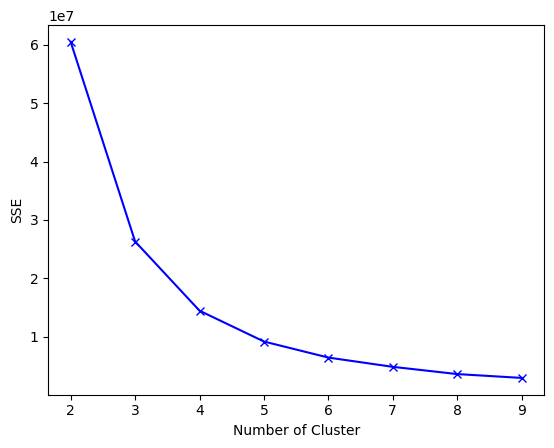

In [5]:
sse={}
for k in range(2,10):
  kmeans=KMeans(n_clusters=k,init='random',max_iter=500).fit(class_majority_df)
  sse[k]=kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.savefig("elbow_method.png")

In [6]:
num_of_clusters=7 # since it is the elbow point

In [7]:
kmeans=KMeans(n_clusters=7,init='random',max_iter=500).fit(class_majority_df)
clustering_result['Kmeans']=kmeans.labels_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [8]:
partition1 = class_majority_df
partition1=partition1.reset_index(drop=True)
partition1['cluster_label'] = clustering_result['Kmeans']
partition1 #with cluster labels

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,result,cluster_label
0,118,3,0,0,1,2,2,0,3
1,658,0,2,0,1,2,2,0,2
2,104,3,3,3,2,1,0,0,3
3,960,2,3,3,1,0,1,0,6
4,482,0,3,1,2,1,0,0,4
...,...,...,...,...,...,...,...,...,...
953,183,3,0,2,2,1,1,0,3
954,1626,1,1,0,0,0,1,0,1
955,326,3,1,0,0,2,0,0,5
956,1329,1,3,1,0,0,1,0,0


**KMeans++ Clustering:**

In [9]:
kmeans=KMeans(n_clusters=num_of_clusters,init='k-means++',max_iter=500).fit(class_majority_df)
clustering_result['Kmeans++']=kmeans.labels_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [10]:

partition2 = class_majority_df
partition2=partition2.reset_index(drop=True)
partition2['cluster_label'] = clustering_result['Kmeans++']
partition2 #with cluster labels

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,result,cluster_label
0,118,3,0,0,1,2,2,0,2
1,658,0,2,0,1,2,2,0,6
2,104,3,3,3,2,1,0,0,2
3,960,2,3,3,1,0,1,0,4
4,482,0,3,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...
953,183,3,0,2,2,1,1,0,2
954,1626,1,1,0,0,0,1,0,3
955,326,3,1,0,0,2,0,0,5
956,1329,1,3,1,0,0,1,0,1


**K-Modes Clustering:**

In [11]:
%pip install kmodes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:

from kmodes.kmodes import KModes


km = KModes(n_clusters=num_of_clusters, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(class_majority_df)

df_0_centroids=km.cluster_centroids_
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3411.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 137, cost: 3336.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3417.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 193, cost: 3417.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3483.0
Best run was number 2


array([3, 0, 6, 4, 2, 1, 0, 2, 0, 5, 5, 0, 0, 5, 5, 2, 0, 0, 3, 4, 2, 0,
       3, 5, 1, 0, 0, 1, 2, 5, 5, 5, 5, 3, 1, 4, 3, 4, 0, 0, 5, 1, 0, 4,
       4, 0, 1, 5, 0, 6, 0, 1, 1, 0, 0, 0, 3, 3, 0, 4, 3, 0, 1, 2, 1, 6,
       4, 1, 0, 4, 3, 0, 0, 5, 0, 6, 5, 1, 6, 2, 1, 1, 4, 3, 4, 6, 5, 1,
       5, 0, 6, 0, 4, 6, 6, 0, 1, 6, 4, 0, 1, 1, 1, 0, 2, 4, 1, 1, 1, 0,
       0, 4, 1, 1, 0, 0, 2, 4, 2, 5, 2, 2, 3, 5, 1, 0, 0, 5, 2, 5, 5, 1,
       5, 1, 1, 0, 6, 0, 3, 2, 1, 3, 2, 3, 6, 2, 3, 1, 3, 1, 0, 4, 6, 3,
       0, 4, 1, 1, 6, 1, 0, 5, 0, 0, 6, 0, 1, 1, 0, 4, 2, 3, 0, 2, 0, 0,
       0, 1, 1, 0, 2, 3, 3, 1, 4, 6, 6, 4, 5, 0, 3, 5, 2, 6, 0, 3, 3, 0,
       2, 3, 0, 0, 3, 0, 3, 2, 4, 1, 4, 3, 1, 0, 0, 6, 2, 1, 6, 4, 3, 2,
       6, 0, 1, 3, 0, 2, 3, 1, 0, 0, 3, 0, 2, 0, 5, 6, 0, 5, 5, 2, 0, 0,
       0, 0, 4, 5, 3, 2, 0, 0, 6, 0, 2, 0, 1, 0, 0, 6, 0, 1, 0, 4, 5, 6,
       1, 0, 0, 0, 1, 0, 0, 4, 3, 2, 3, 3, 5, 0, 1, 4, 5, 0, 5, 4, 3, 0,
       1, 0, 6, 2, 4, 4, 0, 5, 1, 5, 1, 3, 4, 1, 0,

In [13]:

partition3 = class_majority_df
partition3=partition3.reset_index(drop=True)
partition3['cluster_label'] = clusters
partition3 #with cluster labels

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,result,cluster_label
0,118,3,0,0,1,2,2,0,3
1,658,0,2,0,1,2,2,0,0
2,104,3,3,3,2,1,0,0,6
3,960,2,3,3,1,0,1,0,4
4,482,0,3,1,2,1,0,0,2
...,...,...,...,...,...,...,...,...,...
953,183,3,0,2,2,1,1,0,3
954,1626,1,1,0,0,0,1,0,0
955,326,3,1,0,0,2,0,0,0
956,1329,1,3,1,0,0,1,0,1


**MINIBATCH KMEANS CLUSTERING:**

In [14]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=num_of_clusters, batch_size=40, n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(class_majority_df)
clustering_result['Minibatch']=mbk.labels_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [15]:

clustering_result['Minibatch'].values

array([6, 2, 6, 4, 5, 4, 2, 0, 0, 4, 1, 2, 3, 1, 1, 5, 3, 4, 0, 0, 4, 0,
       3, 1, 4, 5, 6, 1, 6, 1, 1, 1, 1, 3, 3, 6, 2, 6, 4, 2, 3, 1, 2, 1,
       5, 2, 6, 1, 1, 1, 0, 3, 3, 2, 4, 4, 4, 0, 2, 2, 2, 4, 6, 5, 3, 5,
       0, 4, 0, 6, 4, 1, 2, 4, 4, 6, 1, 3, 1, 6, 2, 6, 1, 0, 5, 1, 1, 3,
       3, 5, 5, 5, 0, 1, 3, 5, 3, 6, 1, 5, 2, 1, 1, 3, 5, 6, 3, 0, 2, 2,
       2, 6, 3, 3, 1, 1, 4, 6, 5, 1, 5, 4, 0, 4, 3, 4, 2, 1, 5, 1, 4, 3,
       1, 3, 3, 3, 6, 4, 4, 2, 6, 0, 5, 5, 6, 6, 0, 1, 2, 3, 4, 1, 5, 6,
       2, 1, 2, 1, 1, 6, 5, 4, 2, 1, 5, 2, 6, 3, 5, 6, 2, 3, 2, 6, 0, 5,
       2, 0, 3, 1, 5, 6, 3, 1, 1, 6, 6, 6, 5, 4, 6, 0, 3, 5, 4, 4, 2, 4,
       5, 3, 5, 3, 3, 2, 4, 4, 0, 3, 6, 4, 6, 2, 2, 4, 6, 1, 4, 4, 4, 4,
       6, 2, 2, 6, 4, 6, 0, 5, 4, 2, 6, 4, 2, 3, 2, 6, 2, 1, 1, 5, 5, 1,
       5, 2, 4, 0, 0, 1, 4, 5, 3, 2, 2, 2, 3, 2, 0, 5, 1, 5, 5, 6, 0, 6,
       2, 2, 2, 5, 3, 4, 4, 6, 5, 1, 5, 0, 1, 2, 3, 6, 1, 4, 3, 0, 6, 2,
       0, 5, 3, 6, 5, 4, 0, 3, 1, 4, 3, 1, 6, 3, 2,

In [16]:
partition4 = class_majority_df
partition4=partition4.reset_index(drop=True)
partition4['cluster_label'] = clustering_result['Minibatch']
partition4

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,result,cluster_label
0,118,3,0,0,1,2,2,0,6
1,658,0,2,0,1,2,2,0,2
2,104,3,3,3,2,1,0,0,6
3,960,2,3,3,1,0,1,0,4
4,482,0,3,1,2,1,0,0,5
...,...,...,...,...,...,...,...,...,...
953,183,3,0,2,2,1,1,0,0
954,1626,1,1,0,0,0,1,0,3
955,326,3,1,0,0,2,0,0,0
956,1329,1,3,1,0,0,1,0,1


**Fuzzy K-Means Clustering**

In [17]:

%pip install fuzzy-c-means
import numpy as np
from fcmeans import FCM


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:

fcm = FCM(n_clusters=num_of_clusters)
fcm.fit(class_majority_df.values)
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(class_majority_df.values)
fcm_labels

array([4, 5, 4, 2, 0, 2, 0, 3, 3, 2, 2, 5, 6, 2, 1, 0, 6, 5, 3, 3, 2, 3,
       6, 2, 2, 3, 4, 2, 4, 2, 1, 1, 1, 6, 6, 4, 0, 4, 5, 5, 6, 1, 5, 2,
       0, 5, 4, 2, 1, 1, 3, 6, 6, 5, 2, 5, 2, 3, 0, 5, 0, 5, 4, 0, 6, 0,
       3, 2, 3, 4, 2, 1, 5, 2, 5, 4, 2, 1, 1, 4, 5, 4, 1, 3, 0, 1, 2, 1,
       6, 0, 0, 0, 3, 1, 6, 3, 6, 4, 1, 0, 0, 1, 1, 6, 0, 4, 6, 4, 0, 5,
       5, 4, 1, 6, 1, 1, 5, 4, 0, 2, 0, 2, 3, 2, 1, 2, 0, 2, 0, 2, 2, 6,
       2, 1, 1, 6, 4, 2, 2, 0, 4, 3, 0, 0, 4, 4, 3, 1, 0, 1, 5, 1, 3, 4,
       5, 1, 5, 1, 1, 4, 3, 2, 5, 1, 3, 0, 4, 6, 3, 4, 5, 6, 5, 4, 3, 3,
       5, 3, 6, 1, 0, 4, 6, 1, 1, 4, 4, 4, 0, 5, 4, 3, 6, 3, 5, 2, 0, 5,
       0, 6, 3, 6, 6, 5, 2, 2, 3, 6, 4, 2, 4, 0, 5, 2, 4, 1, 5, 2, 2, 2,
       4, 5, 0, 4, 5, 4, 3, 0, 5, 5, 4, 5, 5, 6, 5, 4, 0, 2, 2, 0, 0, 1,
       0, 0, 2, 3, 4, 1, 5, 0, 6, 5, 0, 5, 1, 5, 3, 0, 1, 0, 3, 4, 3, 4,
       0, 0, 0, 0, 1, 5, 5, 4, 3, 1, 3, 3, 2, 5, 1, 4, 2, 2, 6, 3, 4, 5,
       3, 0, 6, 4, 3, 2, 3, 6, 1, 2, 1, 2, 4, 6, 5,

In [19]:

partition5 = class_majority_df
partition5=partition5.reset_index(drop=True)
partition5['cluster_label'] = fcm_labels
partition5

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,result,cluster_label
0,118,3,0,0,1,2,2,0,4
1,658,0,2,0,1,2,2,0,5
2,104,3,3,3,2,1,0,0,4
3,960,2,3,3,1,0,1,0,2
4,482,0,3,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...
953,183,3,0,2,2,1,1,0,4
954,1626,1,1,0,0,0,1,0,6
955,326,3,1,0,0,2,0,0,3
956,1329,1,3,1,0,0,1,0,1


In [20]:
partition1, partition2, partition3, partition4,partition5

(     Unnamed: 0  buying  maint  doors  persons  lug_boot  safety  result  \
 0           118       3      0      0        1         2       2       0   
 1           658       0      2      0        1         2       2       0   
 2           104       3      3      3        2         1       0       0   
 3           960       2      3      3        1         0       1       0   
 4           482       0      3      1        2         1       0       0   
 ..          ...     ...    ...    ...      ...       ...     ...     ...   
 953         183       3      0      2        2         1       1       0   
 954        1626       1      1      0        0         0       1       0   
 955         326       3      1      0        0         2       0       0   
 956        1329       1      3      1        0         0       1       0   
 957         434       0      3      0        0         2       0       0   
 
      cluster_label  
 0                3  
 1                2  
 2      

In [21]:
c = 0
for i in range(len(partition1.cluster_label)):
  print(partition1.cluster_label[i], partition2.cluster_label[i], partition3.cluster_label[i],partition4.cluster_label[i],partition5.cluster_label[i])

3 2 3 6 4
2 6 0 2 5
3 2 6 6 4
6 4 4 4 2
4 0 2 5 0
6 4 1 4 2
4 0 0 2 0
5 5 2 0 3
5 5 0 0 3
6 4 5 4 2
6 4 5 1 2
2 6 0 2 5
1 3 0 3 6
6 4 5 1 2
0 1 5 1 1
4 0 2 5 0
1 3 0 3 6
2 6 0 4 5
5 5 3 0 3
5 5 4 0 3
6 4 2 4 2
5 5 0 0 3
1 3 3 3 6
6 4 5 1 2
6 4 1 4 2
5 5 0 5 3
3 2 0 6 4
6 4 1 1 2
3 2 2 6 4
6 4 5 1 2
0 1 5 1 1
0 1 5 1 1
0 1 5 1 1
1 3 3 3 6
1 3 1 3 6
3 2 4 6 4
4 0 3 2 0
3 2 4 6 4
2 6 0 4 5
2 6 0 2 5
1 3 5 3 6
0 1 1 1 1
2 6 0 2 5
6 4 4 1 2
4 0 4 5 0
2 6 0 2 5
3 2 1 6 4
6 4 5 1 2
0 1 0 1 1
0 1 6 1 1
5 5 0 0 3
1 3 1 3 6
1 3 1 3 6
2 6 0 2 5
6 4 0 4 2
2 6 0 4 5
6 4 3 4 2
5 5 3 0 3
4 0 0 2 0
2 6 4 2 5
4 6 3 2 0
2 6 0 4 5
3 2 1 6 4
4 0 2 5 0
1 3 1 3 6
4 0 6 5 0
5 5 4 0 3
6 4 1 4 2
5 5 0 0 3
3 2 4 6 4
6 4 3 4 2
0 1 0 1 1
2 6 0 2 5
6 4 5 4 2
2 6 0 4 5
3 2 6 6 4
6 4 5 1 2
0 1 1 3 1
0 1 6 1 1
3 2 2 6 4
2 6 1 2 5
3 2 1 6 4
0 1 4 1 1
5 5 3 0 3
4 0 4 5 0
0 1 6 1 1
6 4 5 1 2
0 1 1 3 1
1 3 5 3 6
4 0 0 5 0
4 0 6 5 0
4 0 0 5 0
5 5 4 0 3
0 1 6 1 1
1 3 6 3 6
5 5 0 5 3
1 3 1 3 6
3 2 6 6 4
0 1 4 1 1
4 0 0 5 0


**davies_bouldin_score**

In [22]:
from sklearn.metrics import davies_bouldin_score
print("Kmeans (partition 1): ",davies_bouldin_score(class_majority_df, partition1.cluster_label))
print("Kmeans++ (partition 2): ",davies_bouldin_score(class_majority_df, partition2.cluster_label))
print("KModes (partition 3): ",davies_bouldin_score(class_majority_df, partition3.cluster_label))
print("Minibatch Kmeans (partition 4): ",davies_bouldin_score(class_majority_df, partition4.cluster_label))
print("Fuzzy K-means(partition 5): ",davies_bouldin_score(class_majority_df, partition5.cluster_label))

Kmeans (partition 1):  0.5150722324429057
Kmeans++ (partition 2):  0.5149541267816691
KModes (partition 3):  15.447517892051362
Minibatch Kmeans (partition 4):  0.5145309844491373
Fuzzy K-means(partition 5):  0.515174152307507


In [23]:
partitionA, partitionB, partitionC = partition1, partition2, partition4

In [24]:
partitionA, partitionB, partitionC = partition1, partition2, partition4
class_majority = class_majority_df
class_majority['C1'] = partitionA.cluster_label.values
class_majority['C2'] = partitionB.cluster_label.values
class_majority['C3'] = partitionC.cluster_label.values
class_majority.to_csv("DataSets/modified_majority_class.csv")
class_majority

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,result,C1,C2,C3
0,118,3,0,0,1,2,2,0,3,2,6
1,658,0,2,0,1,2,2,0,2,6,2
2,104,3,3,3,2,1,0,0,3,2,6
3,960,2,3,3,1,0,1,0,6,4,4
4,482,0,3,1,2,1,0,0,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...
953,183,3,0,2,2,1,1,0,3,2,0
954,1626,1,1,0,0,0,1,0,1,3,3
955,326,3,1,0,0,2,0,0,5,5,0
956,1329,1,3,1,0,0,1,0,0,1,1
